In [1]:
import libstempo as lst
import libstempo.toasim as toasim
import libstempo.plot as lstplot
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import sys
import enterprise_GWecc as gwecc
import ephem
import json

In [3]:
data_dir = "BayesHopper_sims/"
par_fmt = "ParFiles/{}.par"
tim_fmt = "TimFiles/fake_{}_study4_highergwb.tim"

output_dir = "output"

if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [4]:
# Get list of pulsars
psrjs = sorted([os.path.basename(p).split('.')[0] for p in glob.glob(data_dir + par_fmt.format("*"))])
print(psrjs)

['JPSR00', 'JPSR01', 'JPSR02', 'JPSR03', 'JPSR04', 'JPSR05', 'JPSR06', 'JPSR07', 'JPSR08', 'JPSR09', 'JPSR10', 'JPSR11', 'JPSR12', 'JPSR13', 'JPSR14', 'JPSR15', 'JPSR16', 'JPSR17', 'JPSR18', 'JPSR19']


In [5]:
def read_pulsar(jname):
    psr_dir = data_dir 
    par_file = psr_dir + "/" + par_fmt.format(jname)
    tim_file = psr_dir + "/" + tim_fmt.format(jname)
    
    psr = lst.tempopulsar(parfile=par_file, timfile=tim_file)
    
    return psr

psrs = []
for psrj in psrjs:
    psr = read_pulsar(psrj)
    psrs.append(psr)

In [6]:
for psr in psrs:
    print(psr.name)

JPSR00
JPSR01
JPSR02
JPSR03
JPSR04
JPSR05
JPSR06
JPSR07
JPSR08
JPSR09
JPSR10
JPSR11
JPSR12
JPSR13
JPSR14
JPSR15
JPSR16
JPSR17
JPSR18
JPSR19


In [7]:
def uniform_sample(n,a,b):
    return np.random.rand(n)*(b-a) + a

efac_min, efac_max = 0.8, 1.2
efacs = uniform_sample(len(psrs), efac_min, efac_max)

log10_equad_min, log10_equad_max = -10, -7
log10_equads = uniform_sample(len(psrs), log10_equad_min, log10_equad_max)
equads = 10**log10_equads

log10_rn_A_min, log10_rn_A_max = -20, -15
log10_rn_As = uniform_sample(len(psrs), log10_rn_A_min, log10_rn_A_max)
rn_As = 10**log10_rn_As

rn_gamma_min, rn_gamma_max = 0.1, 7
rn_gammas = uniform_sample(len(psrs), rn_gamma_min, rn_gamma_max)

rn_nharms = 15

In [8]:
true_noise_params = np.transpose([psrjs, efacs, equads, rn_As, rn_gammas])
header = "PSRJ\tEFAC\tEQUAD\tRN_AMPL\tRN_GAMMA"
np.savetxt(output_dir + "/true_noise_params.dat", true_noise_params, fmt='%s %s %s %s %s', 
           comments='#', header=header)

In [9]:
gwb_Amp = 1e-15
gwb_gam = 13./3
true_gwb_params = np.array([[gwb_Amp, gwb_gam]])
np.savetxt(output_dir + "/true_gwb_params.dat", true_gwb_params,
           comments='#', header="Amp\tgamma")

In [10]:
for psr, ef, eq, rnA, rngam in zip(psrs, efacs, equads, rn_As, rn_gammas):
    toasim.make_ideal(psr)
    toasim.add_efac(psr, ef)
    toasim.add_equad(psr, eq)
    toasim.add_rednoise(psr, rnA, rngam, components=rn_nharms)
    print("Simulated TOAs for", psr.name)
toasim.createGWB(psrs, Amp=gwb_Amp, gam=gwb_gam)

Simulated TOAs for JPSR00
Simulated TOAs for JPSR01
Simulated TOAs for JPSR02
Simulated TOAs for JPSR03
Simulated TOAs for JPSR04
Simulated TOAs for JPSR05
Simulated TOAs for JPSR06
Simulated TOAs for JPSR07
Simulated TOAs for JPSR08
Simulated TOAs for JPSR09
Simulated TOAs for JPSR10
Simulated TOAs for JPSR11
Simulated TOAs for JPSR12
Simulated TOAs for JPSR13
Simulated TOAs for JPSR14
Simulated TOAs for JPSR15
Simulated TOAs for JPSR16
Simulated TOAs for JPSR17
Simulated TOAs for JPSR18
Simulated TOAs for JPSR19


In [39]:
def save_psr_sim(psr,savedir):
    if not os.path.exists(f"{output_dir}/{savedir}/"):
        os.mkdir(f"{output_dir}/{savedir}/")
        
    print("Writing simulated data for", psr.name)
    psr.savepar("{}/{}/{}_simulate.par".format(output_dir, savedir, psr.name))
    psr.savetim("{}/{}/{}_simulate.tim".format(output_dir, savedir, psr.name))
    lst.purgetim("{}/{}/{}_simulate.tim".format(output_dir, savedir, psr.name))
    
for psr in psrs:
    psr.fit()
    save_psr_sim(psr, "GWB_only")

Writing simulated data for JPSR00
Writing simulated data for JPSR01


Results for PSR JPSR00


RMS pre-fit residual = 0.000 (us), RMS post-fit residual = 0.936 (us)
Fit Chisq = 0	Chisqr/nfree = 0.00/0 = -nan	pre/post = 0
Number of fit parameters: 0
Number of points in fit = 0
Offset: 0 1 offset_e*sqrt(n) = 0 n = 0


PARAMETER       Pre-fit                   Post-fit                  Uncertainty   Difference   Fit
---------------------------------------------------------------------------------------------------
RAJ (rad)       2.44266464632084          2.44266464549495          1.1028e-09    -8.2589e-10   Y
RAJ (hms)       9:19:49.05                 09:19:49.0500000         1.5165e-05    -1.1357e-05  
DECJ (rad)      -1.32138538298914         -1.32138538301245         2.65e-10      -2.3307e-11   Y
DECJ (dms)      -75:42:35.3               -75:42:35.30000           5.466e-05     -4.8074e-06  
F0 (s^-1)       205.530696088273          205.530696088272          4.103e-13     -9.3792e-13  

Binary model          Writing simulated data for JPSR04
Writing simulated data for JPSR05
 NONE
[textOutput.C:1086] Warning: UNITS was not set in the parameter file: using TCB (tempo2)
In here writing a new parameter file: output/GWB_only/JPSR03_simulate.par
Notice: There were 1 warnings. Summaries are shown below, check logs for full details.
Warning #1: UNITS was not set in the parameter file: using TCB (tempo2)


Results for PSR JPSR04


RMS pre-fit residual = 0.000 (us), RMS post-fit residual = 0.642 (us)
Fit Chisq = 0	Chisqr/nfree = 0.00/0 = -nan	pre/post = 0
Number of fit parameters: 0
Number of points in fit = 0
Offset: 0 1 offset_e*sqrt(n) = 0 n = 0


PARAMETER       Pre-fit                   Post-fit                  Uncertainty   Difference   Fit
---------------------------------------------------------------------------------------------------
RAJ (rad)       5.18903985354538          5.18903985330141          4.161e-10     -2.4398e-10   Y
RAJ (hms)       19:49:14.42        

Total proper motion = 6.4459 +/- 0.0756Writing simulated data for JPSR08
Writing simulated data for JPSR09
5 mas/yr
Total time span = 3630.000 days = 9.938 years

Tempo2 usage
Units:                 TCB (tempo2)
Time ephemeris:        IF99 (tempo2)
Troposphere corr.?     Yes (tempo2)
Dilate freq?           Yes (tempo2)
Electron density (1AU) 4
Solar system ephem     DE436
Time scale             TT(BIPM2016)
Binary model           NONE
[textOutput.C:1086] Warning: UNITS was not set in the parameter file: using TCB (tempo2)
In here writing a new parameter file: output/GWB_only/JPSR07_simulate.par
Notice: There were 1 warnings. Summaries are shown below, check logs for full details.
Warning #1: UNITS was not set in the parameter file: using TCB (tempo2)


Results for PSR JPSR08


RMS pre-fit residual = 0.000 (us), RMS post-fit residual = 2.804 (us)
Fit Chisq = 0	Chisqr/nfree = 0.00/0 = -nan	pre/post = 0
Number of fit parameters: 0
Number of points in fit = 0
Offset: 0 1 offset_e*sqrt(n) =

-----------------------------------------------------------------------Writing simulated data for JPSR12
----------------------------
[textOutput.C:299] Notice: Parameter uncertainties NOT multiplied by sqrt(red. chisq)


Derived parameters:

P0 (s)      = 0.00486545328280575       9.7124e-18   
P1          = 1.01934825048407e-20      6.0022e-26   
tau_c (Myr) = 7567.7
bs (G)      = 2.2536e+08

Total proper motion = 6.4658 +/- 0.012058 mas/yr
Total time span = 3630.000 days = 9.938 years

Tempo2 usage
Units:                 TCB (tempo2)
Time ephemeris:        IF99 (tempo2)
Troposphere corr.?     Yes (tempo2)
Dilate freq?           Yes (tempo2)
Electron density (1AU) 4
Solar system ephem     DE436
Time scale             TT(BIPM2016)
Binary model           NONE
[textOutput.C:1086] Warning: UNITS was not set in the parameter file: using TCB (tempo2)
In here writing a new parameter file: output/GWB_only/JPSR11_simulate.par
Notice: There were 1 warnings. Summaries are shown below, check log

TZRSITE         AXIS Writing simulated data for JPSR16
                    
TRES            -nan                      1.68092667031319          0             -nan          N
EPHVER          TEMPO2                    TEMPO2                    0             0             N
DM_SERIES       TAYLOR                   
---------------------------------------------------------------------------------------------------
[textOutput.C:299] Notice: Parameter uncertainties NOT multiplied by sqrt(red. chisq)


Derived parameters:

P0 (s)      = 0.00486545328280564       9.7134e-18   
P1          = 1.01935520093969e-20      6.0025e-26   
tau_c (Myr) = 7567.7
bs (G)      = 2.2536e+08

Total proper motion = 6.4684 +/- 0.072787 mas/yr
Total time span = 3630.000 days = 9.938 years

Tempo2 usage
Units:                 TCB (tempo2)
Time ephemeris:        IF99 (tempo2)
Troposphere corr.?     Yes (tempo2)
Dilate freq?           Yes (tempo2)
Electron density (1AU) 4
Solar system ephem     DE436
Time scale    

In [40]:
day_to_s = 24*3600

tref = float( max([max(psr.toas()) for psr in psrs]) * day_to_s )

gwecc_params = {"cos_gwtheta" : 0.3,
                "gwphi"       : np.pi/4,
                "log10_dist"  : -1.2,
                "log10_h"     : None,
                "psi"         : 0, 
                "cos_inc"     : 0.6,
                "log10_M"     : 9, 
                "q"           : 1, 
                "log10_F"     : -8, 
                "e0"          : 0.5, 
                "gamma0"      : 0, 
                "l0"          : 0, 
                "tref"        : tref,
                "z"           : 0.0}

def add_gwecc(psr, gwecc_params):
    toas = (psr.toas() * day_to_s).astype("double")
    
    params = dict(zip(psr.pars(), psr.vals()))
    if 'RAJ' in psr.pars():
        theta = float(np.pi/2 - params['DECJ'])
        phi = float(params['RAJ'])
    elif "ELAT" in psr.pars():
        rad_to_deg = 180.0 / np.pi
        coords = ephem.Equatorial(ephem.Ecliptic(str(psr["ELONG"].val * rad_to_deg), str(psr["ELAT"].val * rad_to_deg)))

        theta = np.pi / 2 - float(repr(coords.dec))
        phi = float(repr(coords.ra))
    
    signal = gwecc.eccentric_cw_delay(toas=toas, theta=theta, phi=phi, 
                                      pdist=1, 
                                      psrTerm=True, evolve=True,
                                      **gwecc_params) / day_to_s
    
    psr.stoas[:] += signal 
    
    return signal

In [ ]:
day_to_s = 24*3600

tref = float( max([max(psr.toas()) for psr in psrs]) * day_to_s )


cos_gwtheta=0.29024826852579777
gwphi=0.7595659584524571
log10_dist=-1.9970282600758034
log10_mc=8
log10_fgw=-8.583513667106518
cos_inc=1.000038637882258
psi=1.7883014691820427
e0=0.8206181271320038
tref=4892832557.172376

gwecc_params = {"cos_gwtheta" : 0.29024826852579777,
                "gwphi"       : 0.7595659584524571,
                "log10_dist"  : -1.9970282600758034,
                "log10_h"     : None,
                "psi"         : 1.7883014691820427, 
                "cos_inc"     : 1.000038637882258,
                "log10_M"     : 9, 
                "q"           : 1, 
                "log10_F"     : -8, 
                "e0"          : 0.5, 
                "gamma0"      : 0, 
                "l0"          : 0, 
                "tref"        : tref,
                "z"           : 0.0}

def add_gwecc(psr, gwecc_params):
    toas = (psr.toas() * day_to_s).astype("double")
    
    params = dict(zip(psr.pars(), psr.vals()))
    if 'RAJ' in psr.pars():
        theta = float(np.pi/2 - params['DECJ'])
        phi = float(params['RAJ'])
    elif "ELAT" in psr.pars():
        rad_to_deg = 180.0 / np.pi
        coords = ephem.Equatorial(ephem.Ecliptic(str(psr["ELONG"].val * rad_to_deg), str(psr["ELAT"].val * rad_to_deg)))

        theta = np.pi / 2 - float(repr(coords.dec))
        phi = float(repr(coords.ra))
    
    signal = gwecc.eccentric_cw_delay(toas=toas, theta=theta, phi=phi, 
                                      pdist=1, 
                                      psrTerm=True, evolve=True,
                                      **gwecc_params) / day_to_s
    
    psr.stoas[:] += signal 
    
    return signal

In [41]:
with open(output_dir + "/true_gwecc_params.dat", 'w') as outfile:
    json.dump(gwecc_params, outfile, indent=4)

In [42]:
for psr in psrs:
    signal = add_gwecc(psr, gwecc_params)
    print("Simulated TOAs for", psr.name)

Simulated TOAs for JPSR00
Simulated TOAs for JPSR01
Simulated TOAs for JPSR02
Simulated TOAs for JPSR03
Simulated TOAs for JPSR04
Simulated TOAs for JPSR05
Simulated TOAs for JPSR06
Simulated TOAs for JPSR07
Simulated TOAs for JPSR08
Simulated TOAs for JPSR09
Simulated TOAs for JPSR10
Simulated TOAs for JPSR11
Simulated TOAs for JPSR12
Simulated TOAs for JPSR13
Simulated TOAs for JPSR14
Simulated TOAs for JPSR15
Simulated TOAs for JPSR16
Simulated TOAs for JPSR17
Simulated TOAs for JPSR18
Simulated TOAs for JPSR19


JPSR00 1.0362442237076614 1.9129940068101906e-10 1.3033962326004237e-16 0.5304233838636265


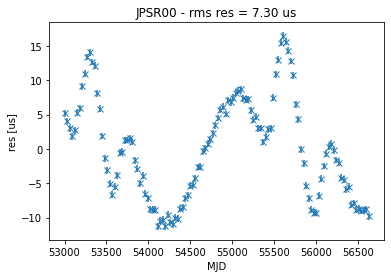

JPSR01 1.1251414978983452 4.208668615543306e-09 1.0458076535363377e-20 3.1810257553092787


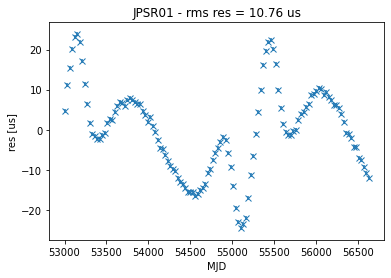

JPSR02 1.1720911025717566 1.351285947547692e-10 1.0832816860787418e-19 0.7551917911027005


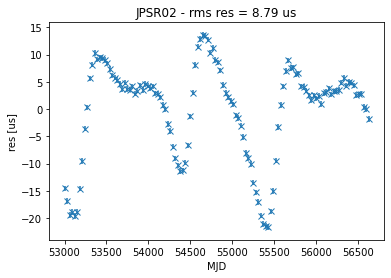

JPSR03 0.9691576557204071 1.5888073532048903e-08 4.614348165199156e-20 5.972304319276343


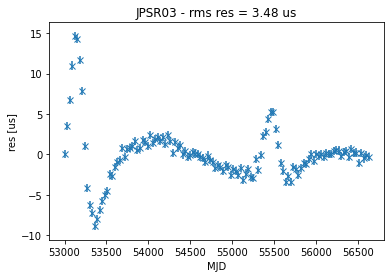

JPSR04 1.1751750300788248 1.8086003463516929e-10 1.1805679443315546e-19 5.838133349999726


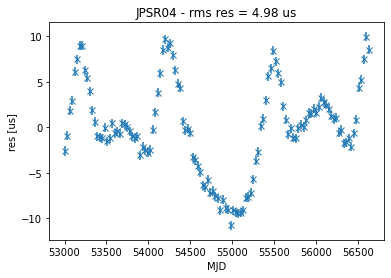

JPSR05 1.0649542484434606 1.324684557898613e-08 1.689207533046289e-19 6.918349298623226


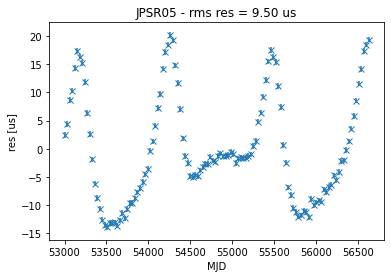

JPSR06 0.9819427642965444 1.0506872530129488e-10 3.4255490850863392e-18 4.733922586550804


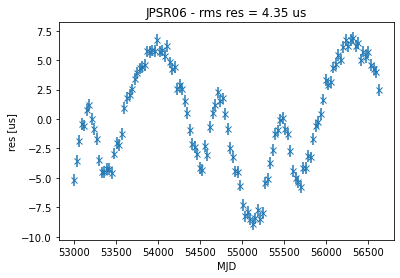

JPSR07 0.8914827595321191 2.024917589205761e-08 2.870771678152069e-20 2.178185927317575


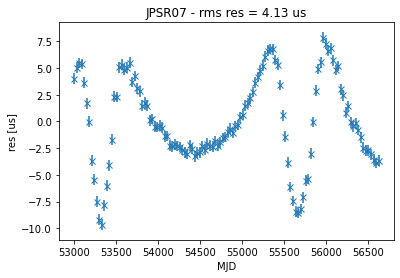

JPSR08 0.9017403919556205 1.672522814254599e-08 3.1648628641665443e-19 4.89995957008459


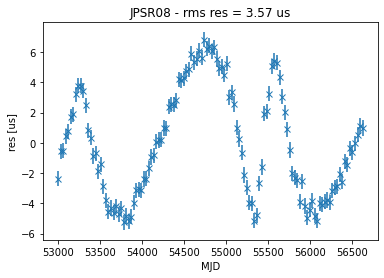

JPSR09 1.1525861484924036 1.2909582556190892e-10 1.2829965406733466e-20 4.469864769613527


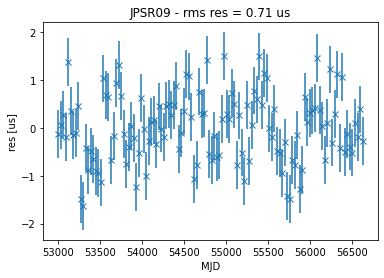

JPSR10 1.0583134811819657 1.0923036303280529e-09 3.0869221131868594e-20 2.063287661821607


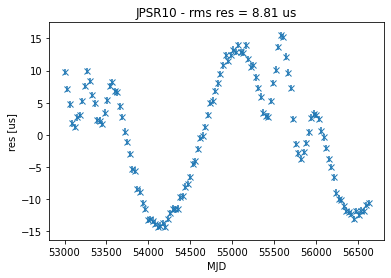

JPSR11 0.8926810215432828 3.8636232738881654e-08 1.2785105915246404e-20 4.134890144410118


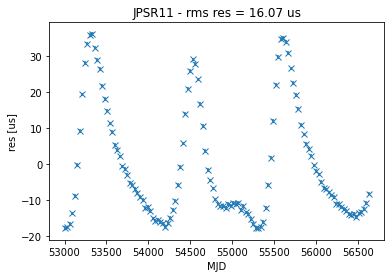

JPSR12 1.0672839168408323 2.1201069630315135e-08 6.69302016859444e-16 4.586580583134347


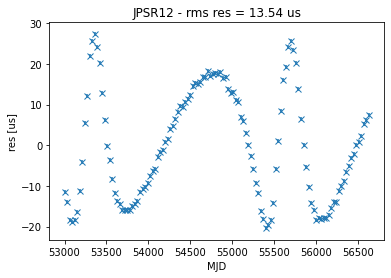

JPSR13 1.1912573291859796 8.973572163281412e-09 6.858478623097033e-20 3.7962279064278697


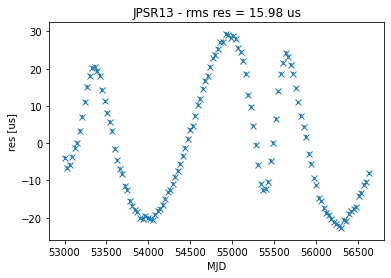

JPSR14 1.1629596435905678 1.512183221952279e-08 8.350866053701801e-19 5.82426071217338


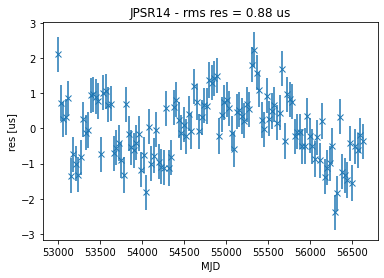

JPSR15 1.015843407162772 1.607666610320857e-08 2.3969768992661854e-17 3.0873169158363467


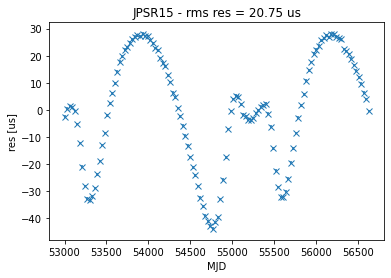

JPSR16 0.9459366501588644 1.4441053226384556e-08 8.873155999064517e-19 1.6832044981356729


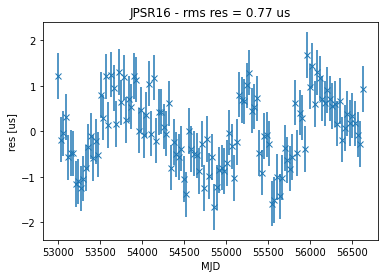

JPSR17 1.1348025946594333 1.1189244713688563e-10 6.399162502940406e-18 4.792712108960816


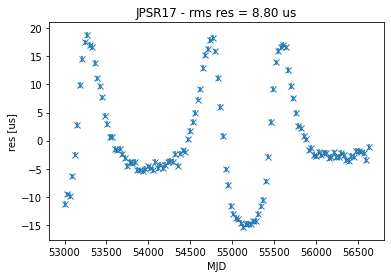

JPSR18 1.1557794621089892 7.205246313944157e-10 1.0670923591907505e-20 0.6054258203698343


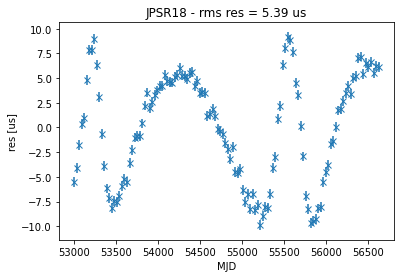

JPSR19 0.9394356011290872 4.452212500350004e-10 6.613027114019494e-20 4.733799425111186


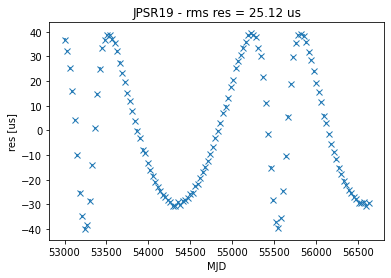

In [43]:
for psr, ef, eq, rnA, rngam in zip(psrs, efacs, equads, rn_As, rn_gammas):
    print(psr.name, ef, eq, rnA, rngam)
    lstplot.plotres(psr)
    plt.show()

In [44]:
for psr in psrs:
    psr.fit()
    save_psr_sim(psr, "GWB+GWecc(E+P)")

Writing simulated data for JPSR00
  0.060978      Y
PX (mas)        4.02291243326134          3.98497396856478          0.10735       -0.037938     Y
TZRMJD          -nan                      53000.0000000016          0             -nan          N
TZRFRQ (MHz)    -nan                      1440                      0             -nan          N
TZRSITE         AXIS                     
TRES            -nan                      0.639930039850968         0             -nan          N
EPHVER          TEMPO2                    TEMPO2                    0             0             N
DM_SERIES       TAYLOR                   
---------------------------------------------------------------------------------------------------
[textOutput.C:299] Notice: Parameter uncertainties NOT multiplied by sqrt(red. chisq)


Derived parameters:

P0 (s)      = 0.00486545328280557       9.7125e-18   
P1          = 1.01936019333454e-20      6.0021e-26   
tau_c (Myr) = 7567.6
bs (G)      = 2.2536e+08

Total prop

POSEPOCH (MJD)  53000 Writing simulated data for JPSR04
                    53000                     0             0             N
DMEPOCH (MJD)   53000                     53000                     0             0             N
PMRA (mas/yr)   -4.05413525836408         -4.36270291710672         0.013437      -0.30857      Y
PMDEC (mas/yr)  -5.03376865001804         -4.89581877111068         0.023903      0.13795       Y
PX (mas)        4.02291243326134          4.14339545439746          0.12178       0.12048       Y
TZRMJD          -nan                      53000.000000001           0             -nan          N
TZRFRQ (MHz)    -nan                      1440                      0             -nan          N
TZRSITE         AXIS                     
TRES            -nan                      3.47726264732214          0             -nan          N
EPHVER          TEMPO2                    TEMPO2                    0             0             N
DM_SERIES       TAYLOR                   


Notice: There were 1 wWriting simulated data for JPSR06
Writing simulated data for JPSR07
arnings. Summaries are shown below, check logs for full details.
Warning #1: UNITS was not set in the parameter file: using TCB (tempo2)


Results for PSR JPSR06


RMS pre-fit residual = 0.000 (us), RMS post-fit residual = 4.349 (us)
Fit Chisq = 0	Chisqr/nfree = 0.00/0 = -nan	pre/post = 0
Number of fit parameters: 0
Number of points in fit = 0
Offset: 0 1 offset_e*sqrt(n) = 0 n = 0


PARAMETER       Pre-fit                   Post-fit                  Uncertainty   Difference   Fit
---------------------------------------------------------------------------------------------------
RAJ (rad)       3.19633781446068          3.19633780823235          4.6003e-10    -6.2283e-09   Y
RAJ (hms)       12:12:32.80                12:12:32.7999998         6.3258e-06    -8.5646e-05  
DECJ (rad)      0.290262314203409         0.290262306837045         8.4382e-10    -7.3664e-09   Y
DECJ (dms)      16:37:50.9      

Troposphere corr.?     Yes (tWriting simulated data for JPSR10
Writing simulated data for JPSR11
empo2)
Dilate freq?           Yes (tempo2)
Electron density (1AU) 4
Solar system ephem     DE436
Time scale             TT(BIPM2016)
Binary model           NONE
[textOutput.C:1086] Warning: UNITS was not set in the parameter file: using TCB (tempo2)
In here writing a new parameter file: output/GWB+GWecc(E+P)/JPSR09_simulate.par
Notice: There were 1 warnings. Summaries are shown below, check logs for full details.
Warning #1: UNITS was not set in the parameter file: using TCB (tempo2)


Results for PSR JPSR10


RMS pre-fit residual = 0.000 (us), RMS post-fit residual = 8.808 (us)
Fit Chisq = 0	Chisqr/nfree = 0.00/0 = -nan	pre/post = 0
Number of fit parameters: 0
Number of points in fit = 0
Offset: 0 1 offset_e*sqrt(n) = 0 n = 0


PARAMETER       Pre-fit                   Post-fit                  Uncertainty   Difference   Fit
-----------------------------------------------------------------

P0 (s)    Writing simulated data for JPSR14
Writing simulated data for JPSR15
  = 0.00486545328280655       9.7132e-18   
P1          = 1.01861661710257e-20      6.0023e-26   
tau_c (Myr) = 7573.1
bs (G)      = 2.2528e+08

Total proper motion = 6.489 +/- 0.010146 mas/yr
Total time span = 3630.000 days = 9.938 years

Tempo2 usage
Units:                 TCB (tempo2)
Time ephemeris:        IF99 (tempo2)
Troposphere corr.?     Yes (tempo2)
Dilate freq?           Yes (tempo2)
Electron density (1AU) 4
Solar system ephem     DE436
Time scale             TT(BIPM2016)
Binary model           NONE
[textOutput.C:1086] Warning: UNITS was not set in the parameter file: using TCB (tempo2)
In here writing a new parameter file: output/GWB+GWecc(E+P)/JPSR13_simulate.par
Notice: There were 1 warnings. Summaries are shown below, check logs for full details.
Warning #1: UNITS was not set in the parameter file: using TCB (tempo2)


Results for PSR JPSR14


RMS pre-fit residual = 0.000 (us), RMS post-fit res

EPHWriting simulated data for JPSR18
VER          TEMPO2                    TEMPO2                    0             0             N
DM_SERIES       TAYLOR                   
---------------------------------------------------------------------------------------------------
[textOutput.C:299] Notice: Parameter uncertainties NOT multiplied by sqrt(red. chisq)


Derived parameters:

P0 (s)      = 0.00486545328280533       9.7124e-18   
P1          = 1.01948698641986e-20      6.0021e-26   
tau_c (Myr) = 7566.7
bs (G)      = 2.2537e+08

Total proper motion = 6.4018 +/- 0.009809 mas/yr
Total time span = 3630.000 days = 9.938 years

Tempo2 usage
Units:                 TCB (tempo2)
Time ephemeris:        IF99 (tempo2)
Troposphere corr.?     Yes (tempo2)
Dilate freq?           Yes (tempo2)
Electron density (1AU) 4
Solar system ephem     DE436
Time scale             TT(BIPM2016)
Binary model           NONE
[textOutput.C:1086] Warning: UNITS was not set in the parameter file: using TCB (tempo2)
I